In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo

In [9]:
match= pd.read_csv('datasetsweek9/matches.csv')
delivery = pd.read_csv('datasetsweek9/deliveries.csv')

ipl = delivery.merge(match, left_on='match_id', right_on='id')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


### Scatter Plot

In [10]:
# scatter plot between batsman avg(x-axis) and batsman strikerate(y axis) of top 50 batsman 

In [11]:
# fetching top 50 batsman
top50 = ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(50).index.tolist()
new_ipl=ipl[ipl['batsman'].isin(top50)]

In [13]:
# calculating SR
# Sr = (no of runs/ no of balls played ) *100
runs=  new_ipl.groupby('batsman')['batsman_runs'].sum()
balls = new_ipl.groupby('batsman')['batsman_runs'].count()

sr=(runs/balls)*100
sr= sr.reset_index()
sr.head(4)

,batsman,batsman_runs
0,AB de Villiers,145.129059
1,AC Gilchrist,133.054662
2,AJ Finch,126.299213
3,AM Rahane,117.486549


In [16]:
# calculating avg
# avg= no of runs/ no of outs

out= ipl[ipl['player_dismissed'].isin(top50)]
nouts = out['player_dismissed'].value_counts()

avg= runs/nouts

avg=avg.reset_index()
avg.rename(columns={'index':'batsman', 0:'avg'}, inplace= True)
avg=avg.merge(sr, on='batsman')
avg.head(3)

,batsman,avg,batsman_runs
0,AB de Villiers,38.307692,145.129059
1,AC Gilchrist,27.223684,133.054662
2,AJ Finch,27.186441,126.299213


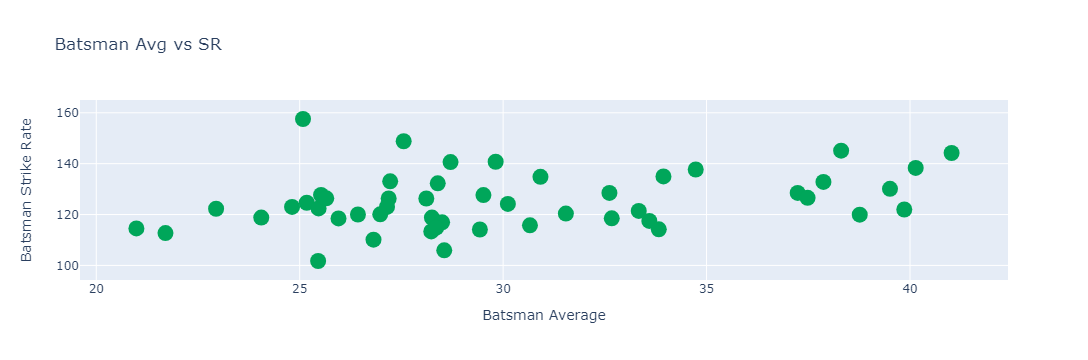

In [23]:
trace=go.Scatter(x=avg['avg'], y=avg['batsman_runs'], mode='markers', text=avg['batsman'] , marker={'color': '#00a65a', 'size': 16})
data=[trace]
layout = go.Layout(title='Batsman Avg vs SR',
                  xaxis={'title': 'Batsman Average'},
                  yaxis={'title': 'Batsman Strike Rate'})
fig=go.Figure(data=data, layout=layout)
fig.show()

### Line Chart 

In [34]:
# year by year batsman performance

single= ipl[ipl['batsman'] == 'V Kohli']
performance= single.groupby('season')['batsman_runs'].sum().reset_index()

single1= ipl[ipl['batsman'] == 'MS Dhoni']
performance1= single1.groupby('season')['batsman_runs'].sum().reset_index()

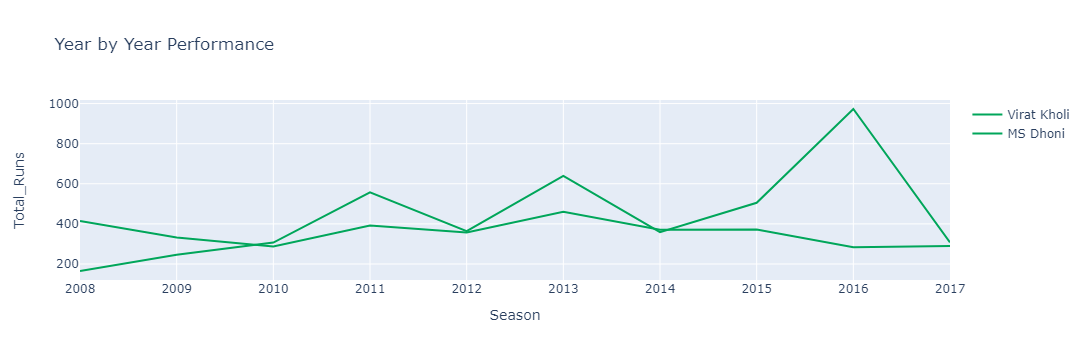

In [36]:
trace=go.Scatter(x=performance['season'], y=performance['batsman_runs'], mode='lines', marker={'color': '#00a65a'}, name='Virat Kholi')

trace1=go.Scatter(x=performance1['season'], y=performance1['batsman_runs'], mode='lines', marker={'color': '#00a65a'}, name='MS Dhoni')


data=[trace, trace1]
layout=go.Layout(title='Year by Year Performance',
                xaxis={'title': 'Season'},
                yaxis={'title': 'Total_Runs'})
fig= go.Figure(data=data, layout=layout)
fig.show()

In [39]:
# Multiple line Chart

def batsman_comp(*name):
    data=[]
    for i in name:
        single=ipl[ipl['batsman']==i]
        performance = single.groupby('season')['batsman_runs'].sum().reset_index()
        
        trace=go.Scatter(x=performance['season'], y=performance['batsman_runs'], mode='lines + markers', name=i)
        
        data.append(trace)
        
    layout=go.Layout(title='Year by Year Performance',
                xaxis={'title': 'Season'},
                yaxis={'title': 'Total_Runs'})
    fig= go.Figure(data=data, layout=layout)

    fig.show()


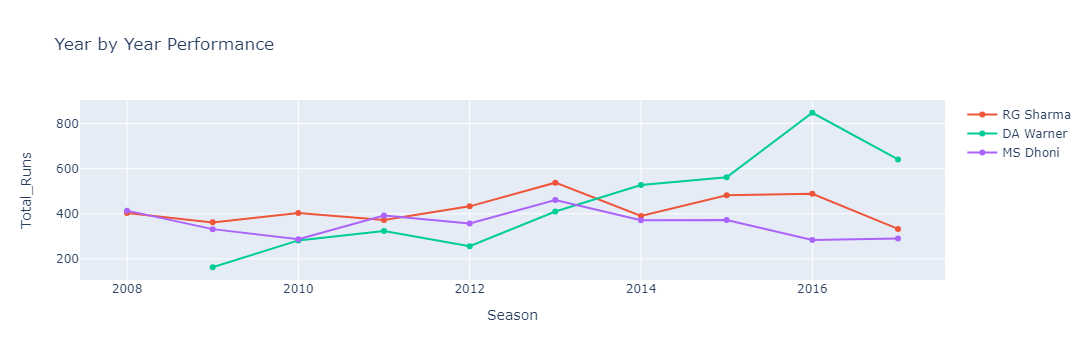

In [40]:
batsman_comp('V kholi', 'RG Sharma', 'DA Warner', 'MS Dhoni')

### Bar Plot

In [43]:
top10= ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).index.tolist()
top10_df= ipl[ipl['batsman'].isin(top10)]

In [44]:
top10_score= top10_df.groupby('batsman')['batsman_runs'].sum().reset_index()
top10_score

,batsman,batsman_runs
0,AB de Villiers,3486
1,CH Gayle,3651
2,DA Warner,4014
3,G Gambhir,4132
4,MS Dhoni,3560
5,RG Sharma,4207
6,RV Uthappa,3778
7,S Dhawan,3561
8,SK Raina,4548
9,V Kohli,4423


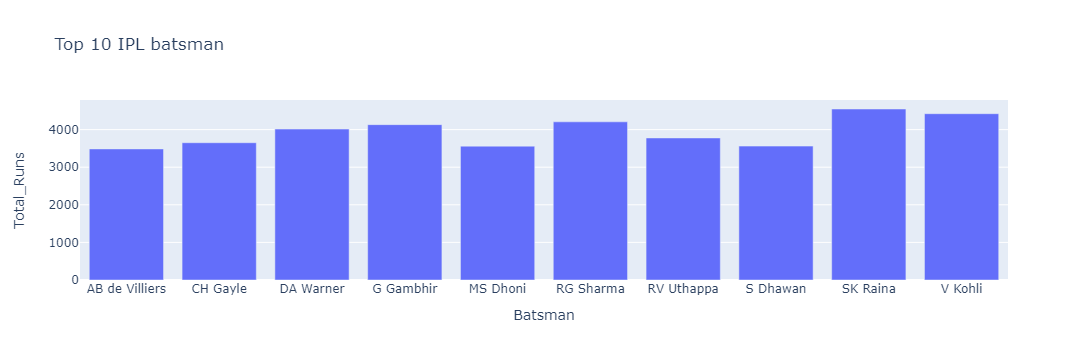

In [45]:
trace= go.Bar(x=top10_score['batsman'], y=top10_score['batsman_runs'])
data=[trace]
layout=go.Layout(title='Top 10 IPL batsman',
                xaxis={'title': 'Batsman'},
                yaxis={'title': 'Total_Runs'})
fig= go.Figure(data=data, layout=layout)

fig.show()

### Types
####  Nested
####  Stacked
####  Overlayed

In [47]:
iw= top10_df.groupby(['batsman', 'inning'])['batsman_runs'].sum().reset_index()
one=iw[iw['inning']==1]
two=iw[iw['inning']==2]

one.rename(columns={'batsman_runs': '1st Innings'}, inplace=True)
two.rename(columns={'batsman_runs': '2nd Innings'}, inplace=True)

final= one.merge(two, on='batsman')[['batsman', '1st Innings', '2nd Innings']]

final

C:\Users\Rimsha\AppData\Local\Temp\ipykernel_8596\3518041865.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rimsha\AppData\Local\Temp\ipykernel_8596\3518041865.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,batsman,1st Innings,2nd Innings
0,AB de Villiers,2128,1345
1,CH Gayle,2003,1623
2,DA Warner,2118,1896
3,G Gambhir,1699,2433
4,MS Dhoni,2232,1328
5,RG Sharma,2344,1863
6,RV Uthappa,1516,2262
7,S Dhawan,2262,1299
8,SK Raina,2647,1893
9,V Kohli,2391,2027


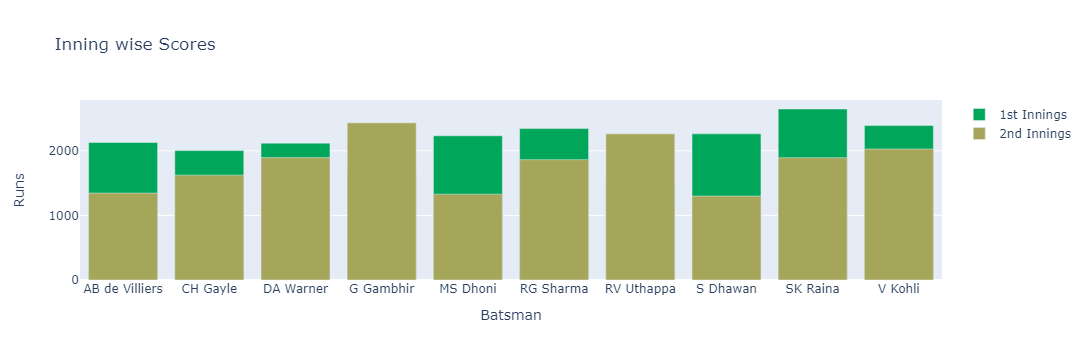

In [52]:
trace=go.Bar(x=final['batsman'], y=final['1st Innings'], marker={'color': '#00a65a'}, name='1st Innings')

trace1=go.Bar(x=final['batsman'], y=final['2nd Innings'], marker={'color': '#a6a65a'}, name='2nd Innings')


data=[trace, trace1]
layout=go.Layout(title='Inning wise Scores',
                xaxis={'title': 'Batsman'},
                yaxis={'title': 'Runs'}, 
                barmode='overlay') # stack, for nested remove barmode option
fig= go.Figure(data=data, layout=layout)
fig.show()

### Bubble Plot

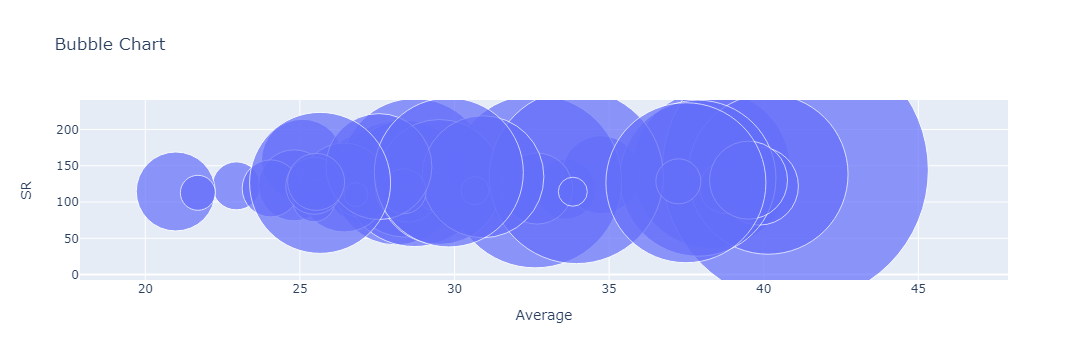

In [61]:
sixes= new_ipl[new_ipl['batsman_runs']==6]
s=sixes.groupby('batsman')['batsman_runs'].count().reset_index()

x = avg.merge(s, on='batsman')

trace=go.Scatter(x=x['avg'], y=x['batsman_runs_x'],mode='markers',  marker={'size': x['batsman_runs_y']})

data=[trace]
layout=go.Layout(title='Bubble Chart',
                xaxis={'title': 'Average'},
                yaxis={'title': 'SR'})
fig= go.Figure(data=data, layout=layout)
fig.show()

### Box Plot

In [62]:
match_agg = delivery.groupby(['match_id'])['total_runs'].sum().reset_index()
season_wise= match_agg.merge(match, left_on='match_id', right_on='id')[['match_id', 'total_runs', 'season']]
season_wise

,match_id,total_runs,season
0,1,379,2017
1,2,371,2017
2,3,367,2017
3,4,327,2017
4,5,299,2017
...,...,...,...
631,632,277,2016
632,633,317,2016
633,634,302,2016
634,635,325,2016


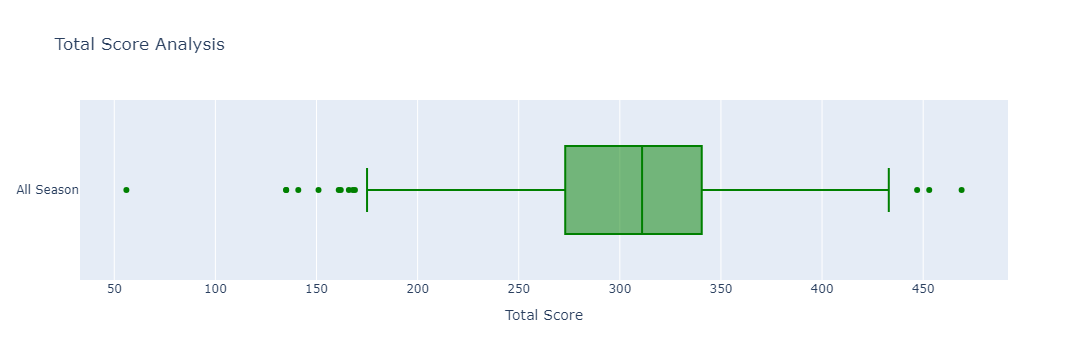

In [64]:
trace=go.Box(x=season_wise['total_runs'], name='All Season', marker={'color':'green'})


data=[trace]
layout=go.Layout(title='Total Score Analysis',
                xaxis={'title': 'Total Score'})
fig= go.Figure(data=data, layout=layout)
fig.show()

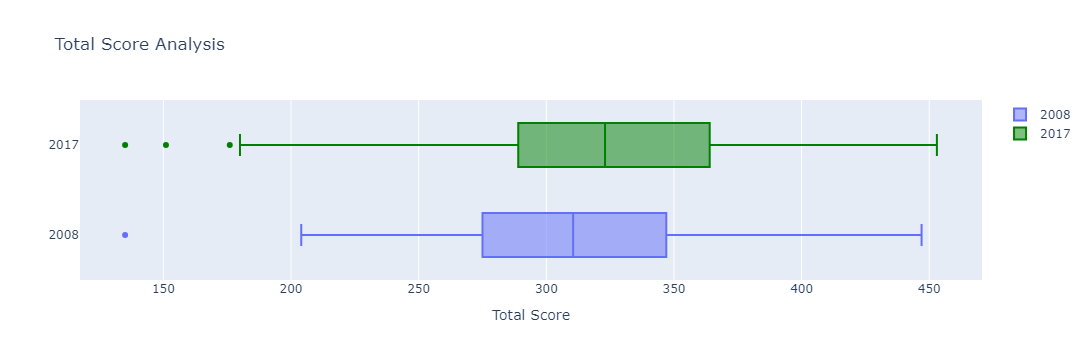

In [67]:
trace=go.Box(x=season_wise[season_wise['season']==2017]['total_runs'], name='2017', marker={'color':'green'})
trace1=go.Box(x=season_wise[season_wise['season']==2008]['total_runs'], name='2008')

data=[trace1, trace]
layout=go.Layout(title='Total Score Analysis',
                xaxis={'title': 'Total Score'})
fig= go.Figure(data=data, layout=layout)
fig.show()

### Distplots

In [68]:
# combination of histogram, kde and rug plot

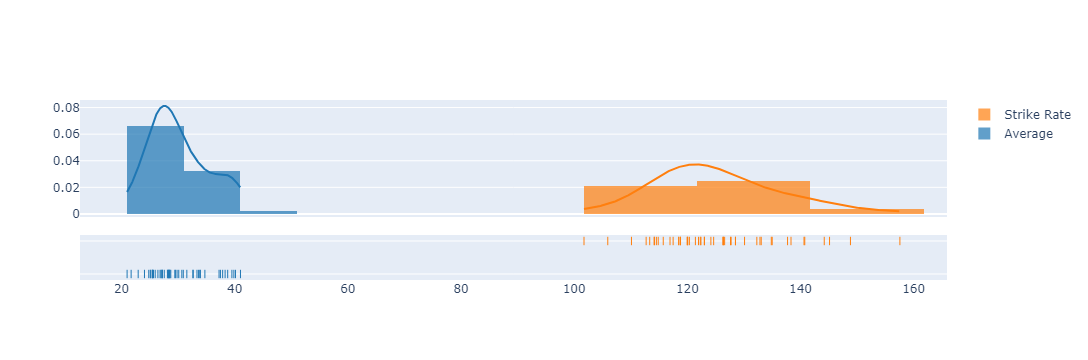

In [73]:
import plotly.figure_factory as ff
hist_data = [avg['avg'], avg['batsman_runs']]
group_labels=['Average', 'Strike Rate']

fig=ff.create_distplot(hist_data, group_labels, bin_size=[10,20])

fig.show()

### Histogram

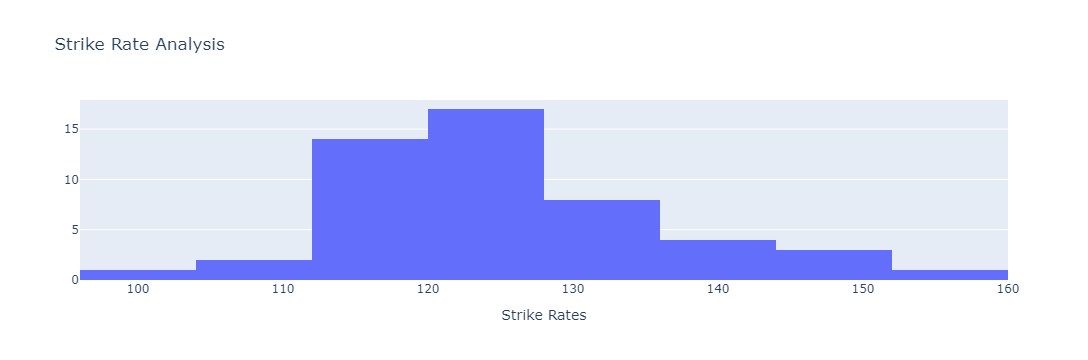

In [77]:
trace=go.Histogram(x=sr['batsman_runs'], xbins={'size': 8}) # you can give start and end 

data=[trace]

layout=go.Layout(title='Strike Rate Analysis',
                xaxis={'title': 'Strike Rates'})

fig= go.Figure(data=data, layout=layout)
fig.show()

In [78]:
# three variables can be categorical, numerical, one value go on x-axis , second go on y-axis and third value on the graph

In [82]:
six = delivery[delivery['batsman_runs'] == 6]
six= six.groupby(['batting_team', 'over'])['batsman_runs'].count().reset_index()

six

# team ny hr over mai kitne sixes mare

,batting_team,over,batsman_runs
0,Chennai Super Kings,1,9
1,Chennai Super Kings,2,21
2,Chennai Super Kings,3,49
3,Chennai Super Kings,4,45
4,Chennai Super Kings,5,53
...,...,...,...
290,Sunrisers Hyderabad,16,31
291,Sunrisers Hyderabad,17,25
292,Sunrisers Hyderabad,18,49
293,Sunrisers Hyderabad,19,58


In [84]:
trace=go.Heatmap(x=six['batting_team'], y=six['over'], z=six['batsman_runs']) # you can give start and end 

data=[trace]

layout=go.Layout(title='Sixes Heatmap')

fig= go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [ ]:
# side by side heatmap